In [1]:
import numpy as np
import torch
import imageio

import matplotlib.pyplot as plt

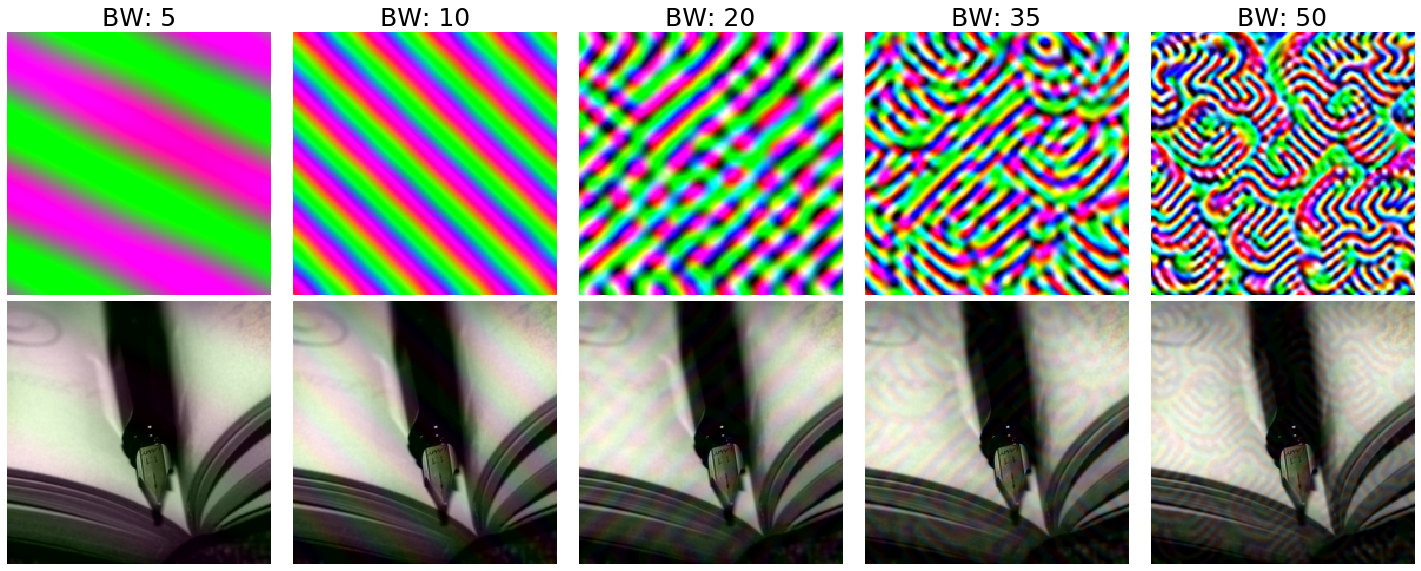

In [2]:
# Load the img (fountain pen)
img = imageio.imread("./img.png")

lp_bws = [5, 10, 20, 35, 50]

fig = plt.figure(figsize=(20,8))
for idx, bw in enumerate(lp_bws):
    # Load UAP 
    uap = torch.load("uap_lp_bw{}.npy".format(bw))
    
    # Amplify UAP
    uap_amp = uap - uap.min()
    uap_amp = uap_amp / uap_amp.max()
    
    # Plot amplified UAP
    ax = plt.subplot(2, len(lp_bws), idx+1)
    ax.imshow(uap_amp)
    plt.axis("off")
    plt.title("BW: {}".format(lp_bws[idx]), fontsize=25)
    
    # Adversarial example 
    adv = np.clip(img/255 + uap, 0, 1)
    
    # Plot adversarial example
    ax = plt.subplot(2,  len(lp_bws), len(lp_bws) + idx + 1 )
    ax.imshow(adv)
    plt.axis("off")

plt.tight_layout()

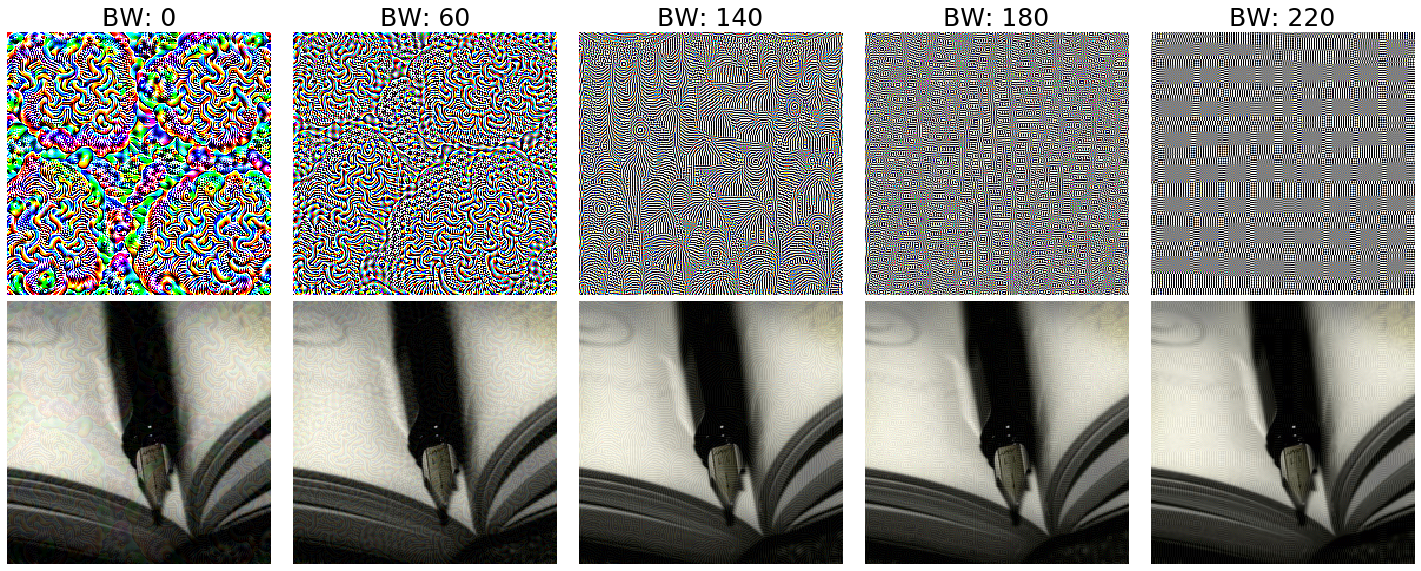

In [3]:
hp_bws = [0, 60, 140, 180, 220]

fig = plt.figure(figsize=(20,8))
for idx, bw in enumerate(hp_bws):
    # Load UAP 
    uap = torch.load("uap_hp_bw{}.npy".format(bw))
    
    # Amplify UAP
    uap_amp = uap - uap.min()
    uap_amp = uap_amp / uap_amp.max()
    
    # Plot amplified UAP
    ax = plt.subplot(2, len(hp_bws), idx+1)
    ax.imshow(uap_amp)
    plt.axis("off")
    plt.title("BW: {}".format(hp_bws[idx]), fontsize=25)
    
    # Adversarial example 
    adv = np.clip(img/255 + uap, 0, 1)
    
    # Plot adversarial example
    ax = plt.subplot(2,  len(hp_bws), len(hp_bws) + idx + 1 )
    ax.imshow(adv)
    plt.axis("off")

plt.tight_layout()
    

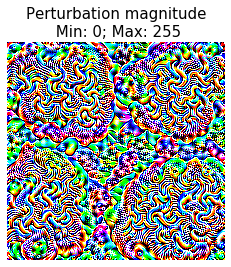

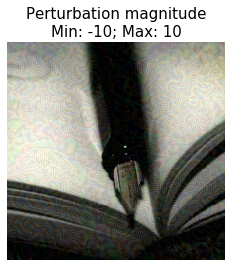

In [4]:
# Load uap BW 0
uap = torch.load("uap_hp_bw0.npy")

# Amplify UAP
uap_amp = uap - uap.min()
uap_amp = uap_amp / uap_amp.max()
plt.imshow(uap_amp)
plt.title("Perturbation magnitude\n Min: {}; Max: {}".format(int(np.round(uap_amp.min()*255, 0)), 
                                                             int(np.round(uap_amp.max()*255, 0))),
         fontsize=15)
plt.axis("off")
plt.show()

# Adversarial example 
adv = np.clip(img/255 + uap, 0, 1)

# Plot adversarial example
plt.imshow(adv)
plt.title("Perturbation magnitude\nMin: {}; Max: {}".format(int(np.round(uap.min()*255, 0)), 
                                                            int(np.round(uap.max()*255, 0))), 
         fontsize=15)
plt.axis("off")
plt.show()